# Left hand (LH) Motor Connectome Analysis -- FPCA vs. HSIC(p=q=2, $\alpha=1$)

## FDR Control -- adjust gained p-values

In [1]:
library(fdrtool)

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr
Step 5... prepare for plotting



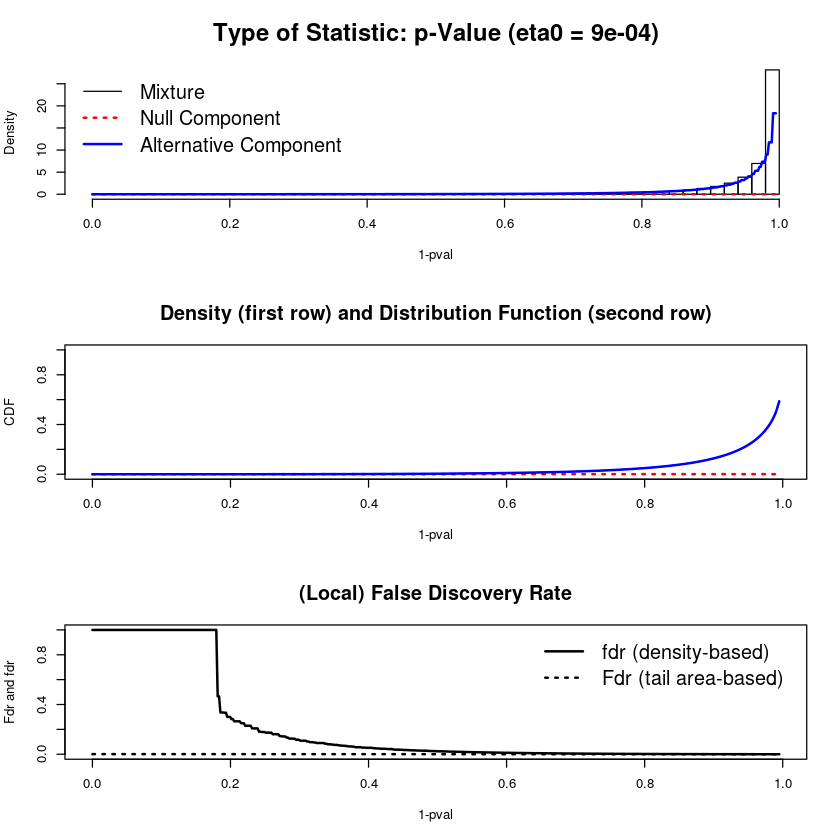

In [2]:
HSIC = read.csv("LHpvalueMatHSIC.txt"); HSIC = HSIC[,-1]; HSIC.vec = 1 - HSIC[lower.tri(HSIC)]
HSIC_fdr = fdrtool(HSIC.vec, statistic = "pvalue")

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr
Step 5... prepare for plotting



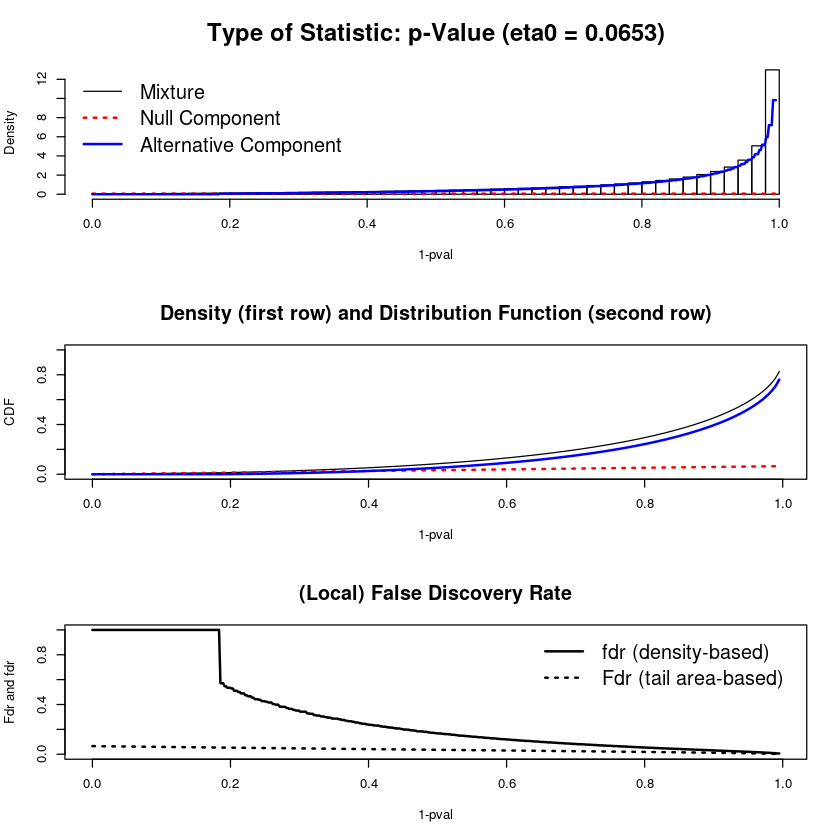

In [3]:
FPCA = read.csv("LHpvalueMatFPCA.txt"); FPCA = FPCA[,-1];FPCA.vec = 1 - FPCA[lower.tri(FPCA)]
FPCA_fdr = fdrtool(FPCA.vec, statistic="pvalue")

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr
Step 5... prepare for plotting



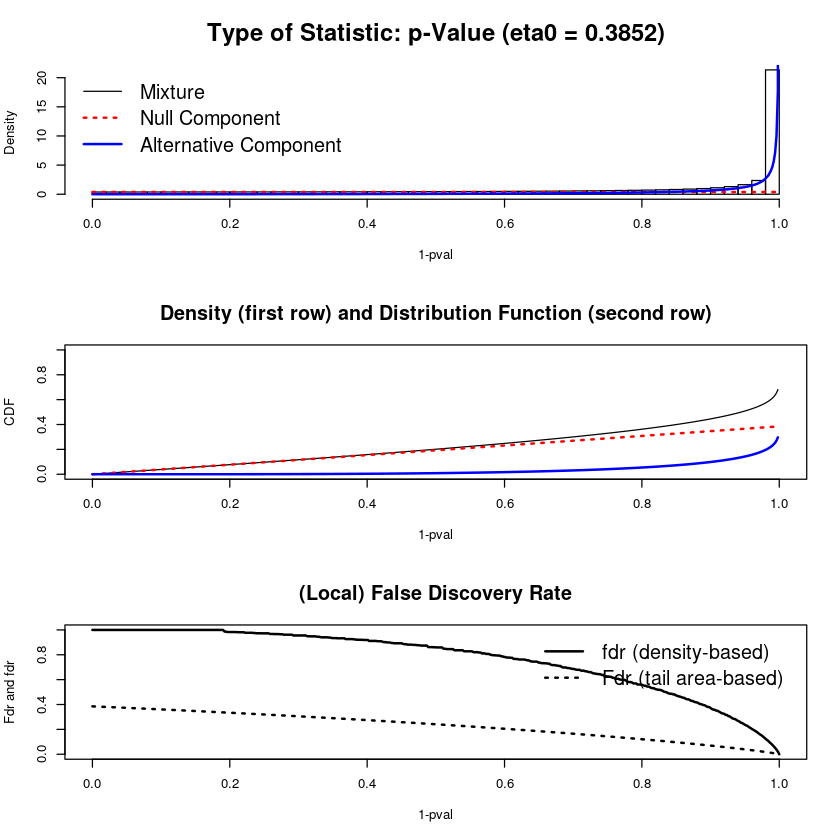

In [4]:
CORR = read.csv("LHpvalueMatCORR.txt"); CORR = CORR[,-1];CORR.vec = CORR[lower.tri(CORR)]
CORR_fdr = fdrtool(CORR.vec, statistic="pvalue")

### Control reasonable proportions of edges

In [10]:
print("HSIC")
mean(HSIC_fdr$qval<0.000015)
mean(HSIC_fdr$qval<0.000020)
mean(HSIC_fdr$qval<0.000025)
mean(HSIC_fdr$qval<0.000030)
mean(HSIC_fdr$qval<0.000035)
mean(HSIC_fdr$qval<0.000040)
mean(HSIC_fdr$qval<0.000045)
mean(HSIC_fdr$qval<0.000050)
mean(HSIC_fdr$qval<0.000055)
mean(HSIC_fdr$qval<0.000060)
mean(HSIC_fdr$qval<0.000065)
mean(HSIC_fdr$qval<0.000070)
print("FPCA")
mean(FPCA_fdr$qval<0.008)
mean(FPCA_fdr$qval<0.009)
mean(FPCA_fdr$qval<0.010)
mean(FPCA_fdr$qval<0.011)
mean(FPCA_fdr$qval<0.012)
mean(FPCA_fdr$qval<0.013)
mean(FPCA_fdr$qval<0.014)
mean(FPCA_fdr$qval<0.015)
mean(FPCA_fdr$qval<0.016)
mean(FPCA_fdr$qval<0.017)
mean(FPCA_fdr$qval<0.018)
mean(FPCA_fdr$qval<0.019)
mean(FPCA_fdr$qval<0.020)
mean(FPCA_fdr$qval<0.021)
mean(FPCA_fdr$qval<0.022)
mean(FPCA_fdr$qval<0.023)
print("CORR")
mean(CORR_fdr$qval<0.010)
mean(CORR_fdr$qval<0.015)
mean(CORR_fdr$qval<0.020)
mean(CORR_fdr$qval<0.025)
mean(CORR_fdr$qval<0.030)
mean(CORR_fdr$qval<0.035)
mean(CORR_fdr$qval<0.040)
mean(CORR_fdr$qval<0.045)
mean(CORR_fdr$qval<0.050)

#plot(ecdf(HSIC_fdr$qval))
#plot(ecdf(FPCA_fdr$qval))

[1] "HSIC"


[1] 0.412366

[1] 0.5040087

[1] 0.5040087

[1] 0.5626874

[1] 0.6076165

[1] 0.6443958

[1] 0.6754171

[1] 0.7019793

[1] 0.7250237

[1] 0.7453059

[1] 0.7632476

[1] 0.77932

[1] "FPCA"


[1] 0.4157645

[1] 0.4471095

[1] 0.47538

[1] 0.5132433

[1] 0.5468212

[1] 0.5672534

[1] 0.5954273

[1] 0.6211636

[1] 0.6447329

[1] 0.6733858

[1] 0.6930456

[1] 0.7113455

[1] 0.7284388

[1] 0.7494655

[1] 0.7641174

[1] 0.7822977

[1] "CORR"


[1] 0.3882559

[1] 0.4138623

[1] 0.4341939

[1] 0.4667312

[1] 0.4932218

[1] 0.5161978

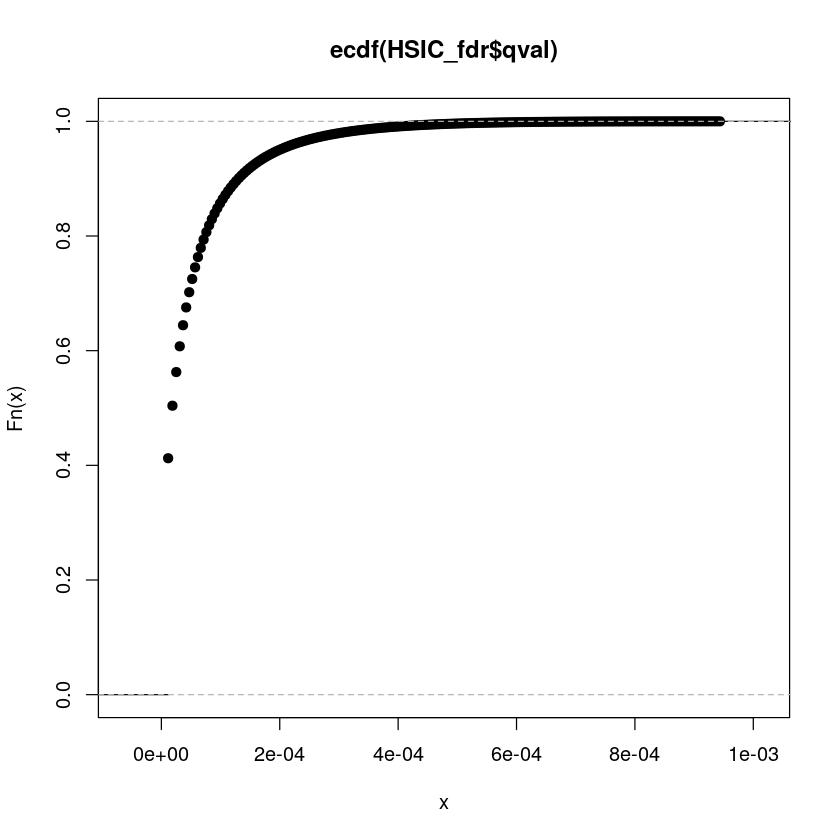

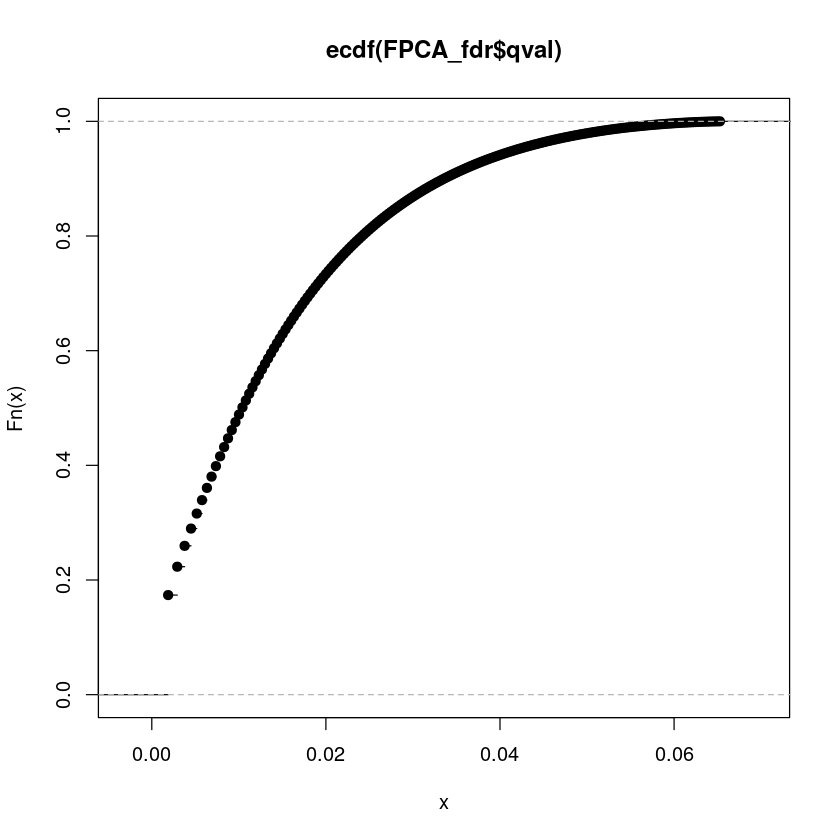

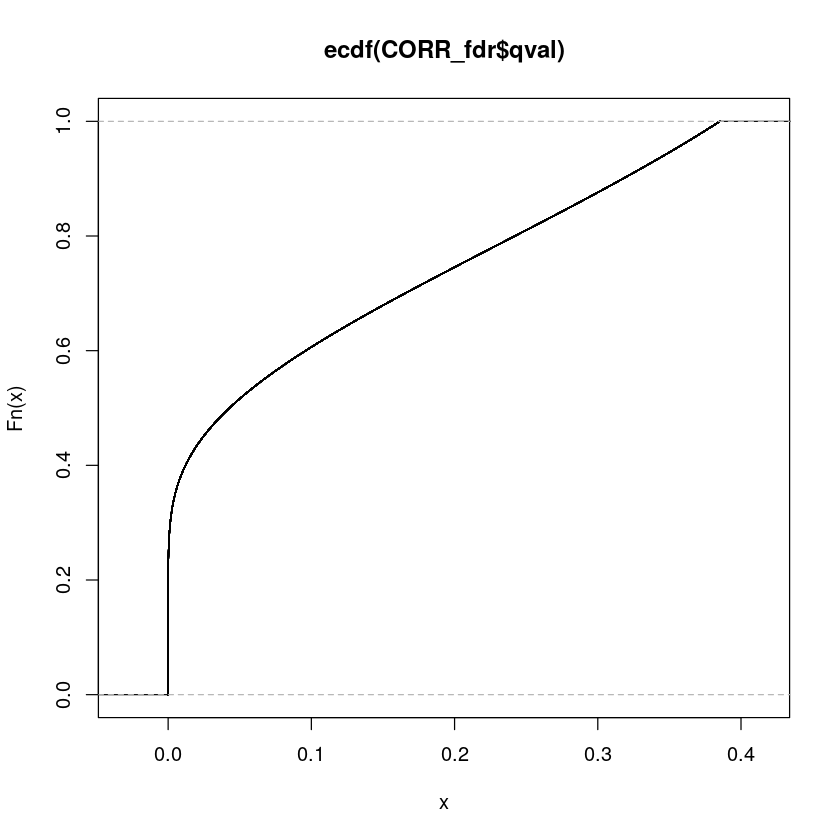

In [40]:
plot(ecdf(HSIC_fdr$qval))
plot(ecdf(FPCA_fdr$qval))
plot(ecdf(CORR_fdr$qval))

## Atlas Parcellation Sorted Laplace Matrix Comparison

In [7]:
HSIC_edges = (HSIC_fdr$qval<0.000012)
HSIC_adj = matrix(0,8004,8004)
HSIC_adj[lower.tri(HSIC_adj)] = as.numeric(HSIC_edges)

FPCA_edges = (FPCA_fdr$qval<0.008)
FPCA_adj = matrix(0,8004,8004)
FPCA_adj[lower.tri(FPCA_adj)] = as.numeric(FPCA_edges)

CORR_edges = (CORR_fdr$qval<0.015)
CORR_adj = matrix(0,8004,8004)
CORR_adj[lower.tri(CORR_adj)] = as.numeric(CORR_edges)

In [8]:
atlas = read.csv("atlasPar.txt",header = FALSE)

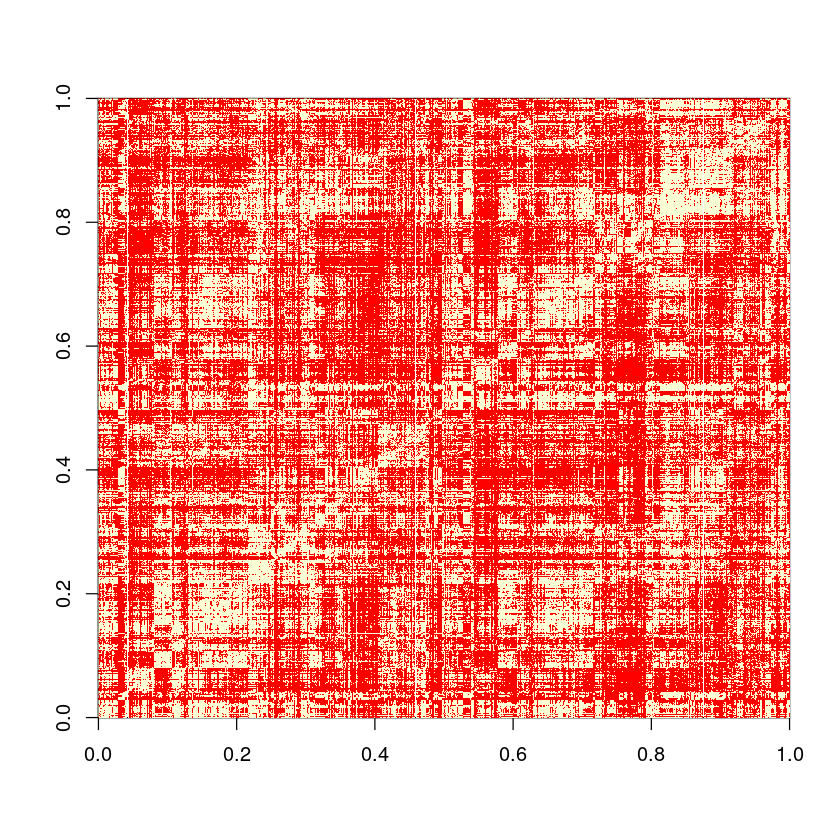

In [13]:
HSIC_image = as.matrix(Matrix::forceSymmetric(HSIC_adj,uplo = "L"))[order(atlas),order(atlas)]
image(HSIC_image)

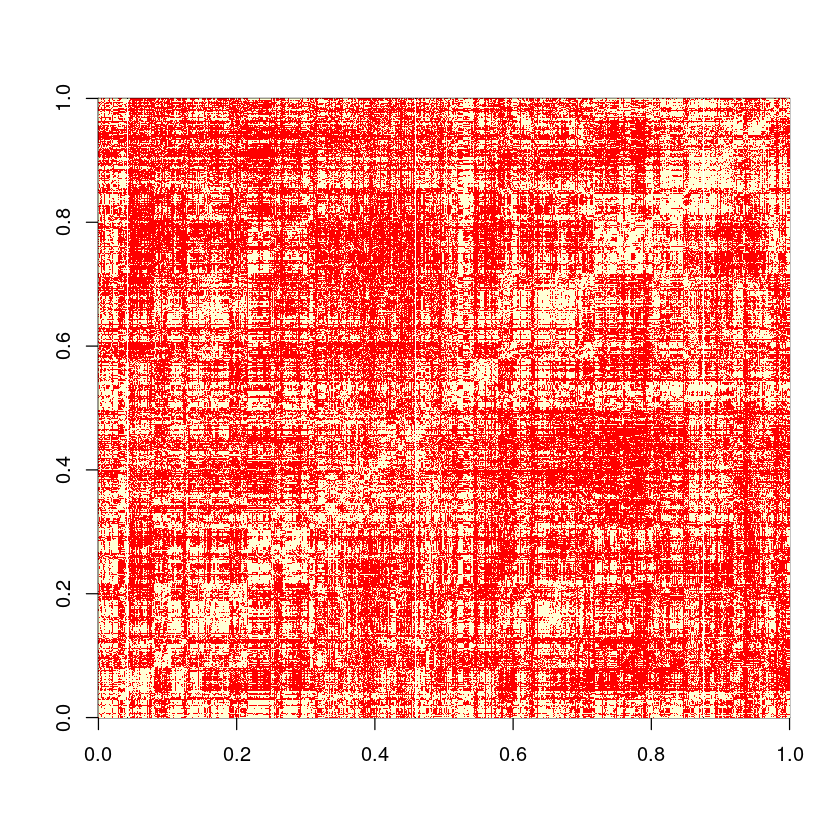

In [14]:
FPCA_image = as.matrix(Matrix::forceSymmetric(FPCA_adj,uplo = "L"))[order(atlas),order(atlas)]
image(FPCA_image)

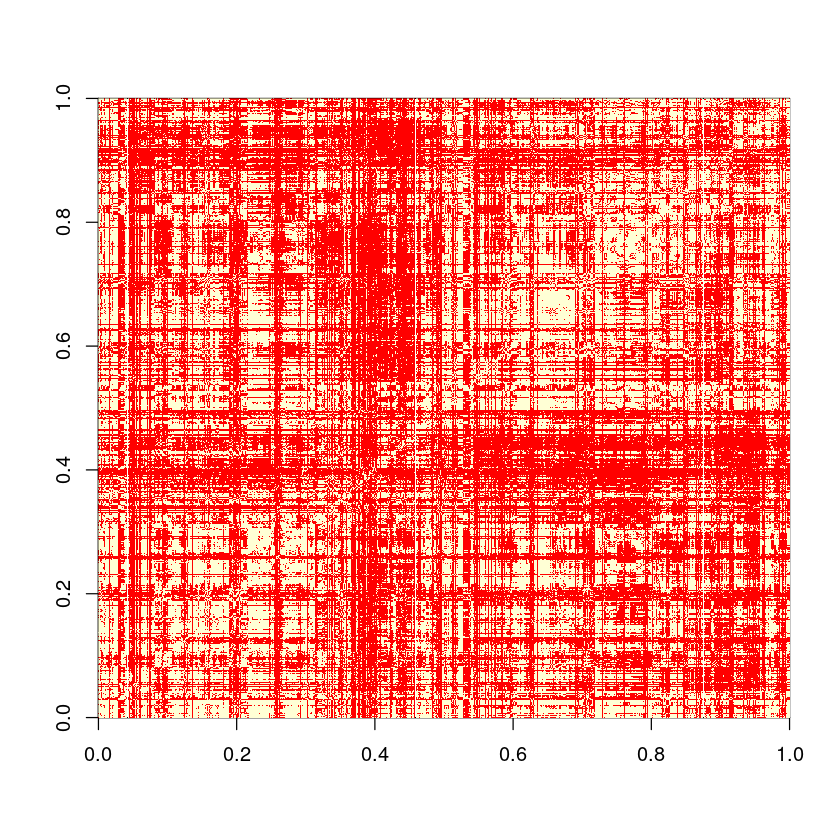

In [15]:
CORR_image = as.matrix(Matrix::forceSymmetric(CORR_adj,uplo = "L"))[order(atlas),order(atlas)]
image(CORR_image)

### Consider Motor/Sensor Area --- Section `6`

In [9]:
ParInd = c(8,53,9,50,52)
ParInd_L = 1   + ParInd
ParInd_R = 182 + ParInd
ParInd_All = c(ParInd_L,ParInd_R)

In [10]:
atlas_fm = data.frame(atlas)
Ind_L = atlas_fm$V1 %in% ParInd_L
Ind_R = atlas_fm$V1 %in% ParInd_R
Ind_All = atlas_fm$V1 %in% ParInd_All

order_L = atlas[Ind_L,][order(match(atlas[Ind_L,],ParInd_L))]
order_R = atlas[Ind_R,][order(match(atlas[Ind_R,],ParInd_R))]
order_All = atlas[Ind_All,][order(match(atlas[Ind_All,],ParInd_All))]

In [11]:
HSIC_image_All = as.matrix(Matrix::forceSymmetric(HSIC_adj,uplo = "L"))[Ind_All,Ind_All][
    order(match(atlas[Ind_All,],ParInd_All)),order(match(atlas[Ind_All,],ParInd_All))]

FPCA_image_All = as.matrix(Matrix::forceSymmetric(FPCA_adj,uplo = "L"))[Ind_All,Ind_All][
    order(match(atlas[Ind_All,],ParInd_All)),order(match(atlas[Ind_All,],ParInd_All))]

CORR_image_All = as.matrix(Matrix::forceSymmetric(CORR_adj,uplo = "L"))[Ind_All,Ind_All][
    order(match(atlas[Ind_All,],ParInd_All)),order(match(atlas[Ind_All,],ParInd_All))]

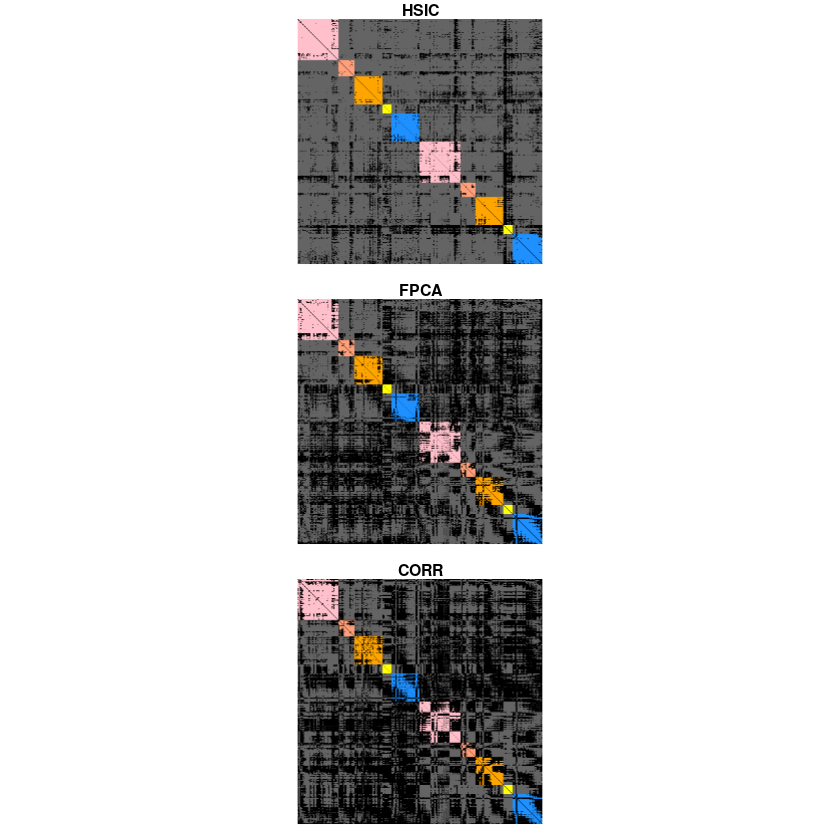

In [12]:
#HSIC_image_All
library(abind)
acomb3 = function(...) abind(...,along = 3)
len_All = sum(Ind_All)
raster_All = array(rep(100, len_All*len_All*3), dim = c(len_All,len_All,3))

# color5 = c("#FFC0CB", "#FFA07A", "#FFA500", "#FFFF00", "#1E90FF","#FFC0CB", "#FFA07A", "#FFA500", "#FFFF00", "#1E90FF")
color_R = rep(c(255,255,255,255,30),times = 2)
color_G = rep(c(192,160,165,255,144),times = 2)
color_B = rep(c(203,122,0,0,255),times = 2)

for(j in 1:10){
    lab = unique(order_All)[j]
    raster_All[order_All==lab, order_All==lab,1] = color_R[j]
    raster_All[order_All==lab, order_All==lab,2] = color_G[j]
    raster_All[order_All==lab, order_All==lab,3] = color_B[j]
}

HSIC_raster_All = as.raster(acomb3(raster_All[,,1] * HSIC_image_All, 
                                      raster_All[,,2] * HSIC_image_All, 
                                      raster_All[,,3] * HSIC_image_All), 
                               max = 255)

FPCA_raster_All = as.raster(acomb3(raster_All[,,1] * FPCA_image_All, 
                                      raster_All[,,2] * FPCA_image_All, 
                                      raster_All[,,3] * FPCA_image_All), 
                               max = 255)

CORR_raster_All = as.raster(acomb3(raster_All[,,1] * CORR_image_All, 
                                      raster_All[,,2] * CORR_image_All, 
                                      raster_All[,,3] * CORR_image_All), 
                               max = 255)

op <- par(mar=c(1,1,1.2,1), mfrow = c(3,1))
plot(HSIC_raster_All)
title(main="HSIC")

plot(FPCA_raster_All)
title(main="FPCA")

plot(CORR_raster_All)
title(main="CORR")
par(op)

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 1 !”

Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr
Step 5... prepare for plotting



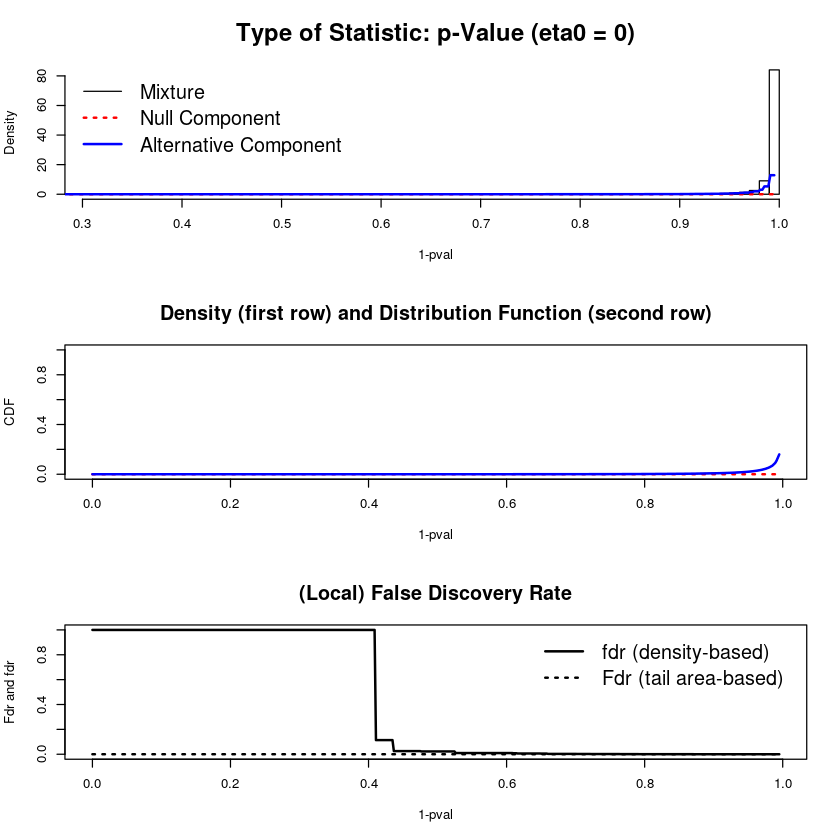

In [13]:
HSIC_sec6 = HSIC[Ind_All,Ind_All][
    order(match(atlas[Ind_All,],ParInd_All)),order(match(atlas[Ind_All,],ParInd_All))]
HSIC_sec6_fdr = fdrtool(1 - HSIC_sec6[lower.tri(HSIC_sec6)], statistic = "pvalue")

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr
Step 5... prepare for plotting



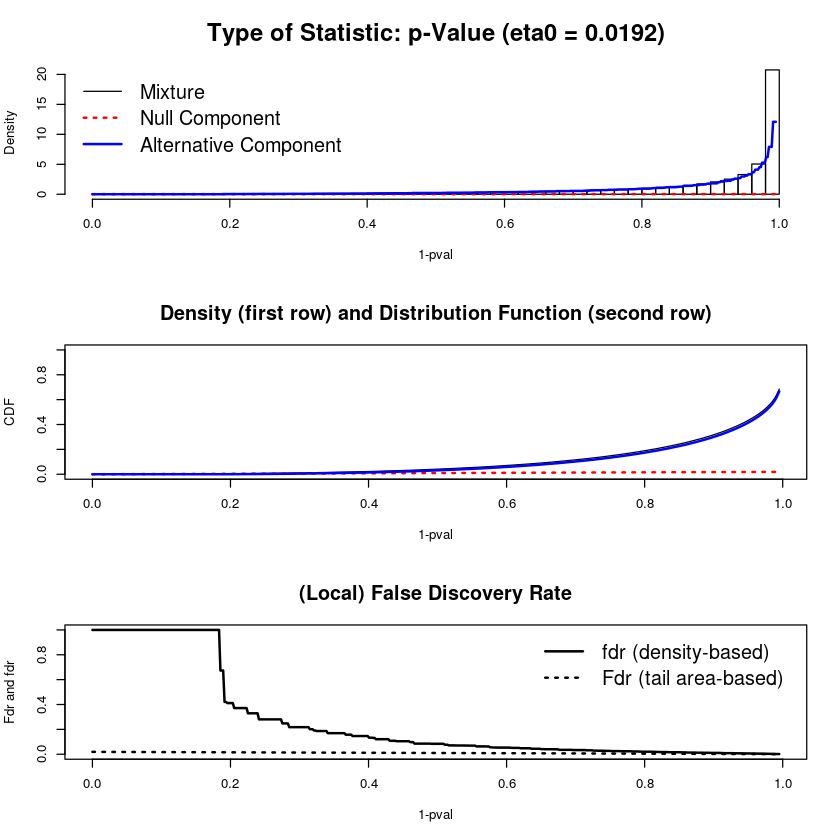

In [14]:
FPCA_sec6 = FPCA[Ind_All,Ind_All][
    order(match(atlas[Ind_All,],ParInd_All)),order(match(atlas[Ind_All,],ParInd_All))]
FPCA_sec6_fdr = fdrtool(1 - FPCA_sec6[lower.tri(FPCA_sec6)], statistic = "pvalue")

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr
Step 5... prepare for plotting



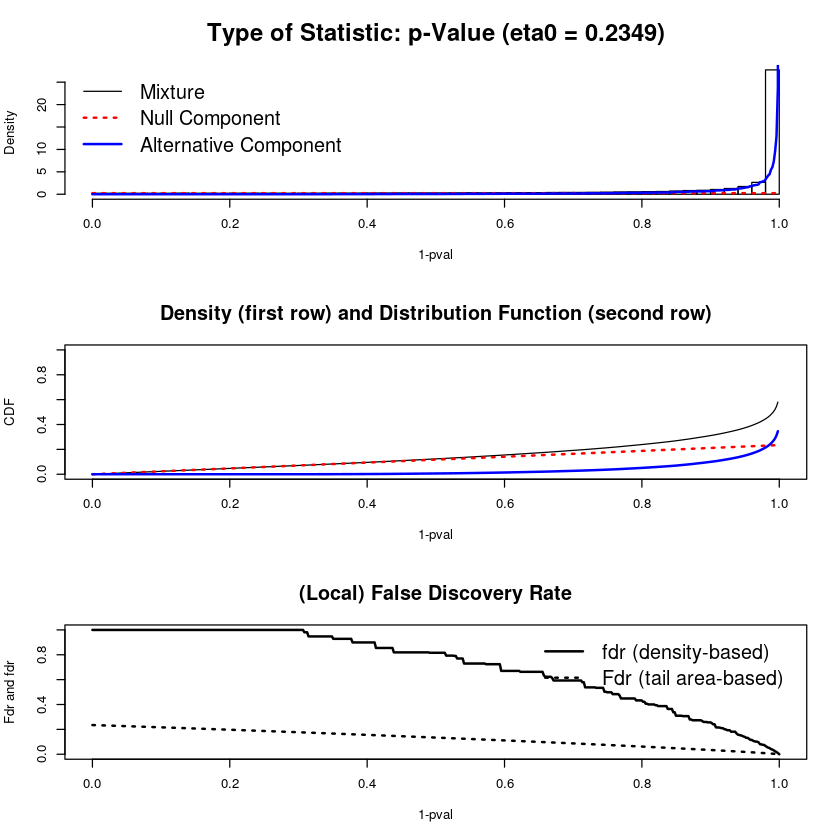

In [15]:
CORR_sec6 = CORR[Ind_All,Ind_All][
    order(match(atlas[Ind_All,],ParInd_All)),order(match(atlas[Ind_All,],ParInd_All))]
CORR_sec6_fdr = fdrtool(CORR_sec6[lower.tri(CORR_sec6)], statistic = "pvalue")

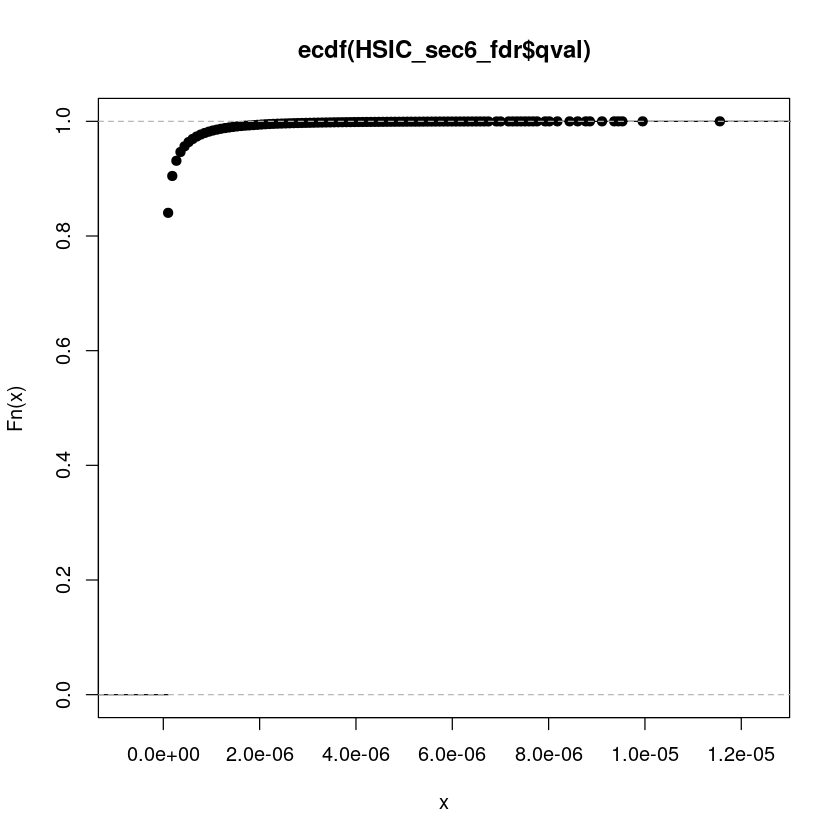

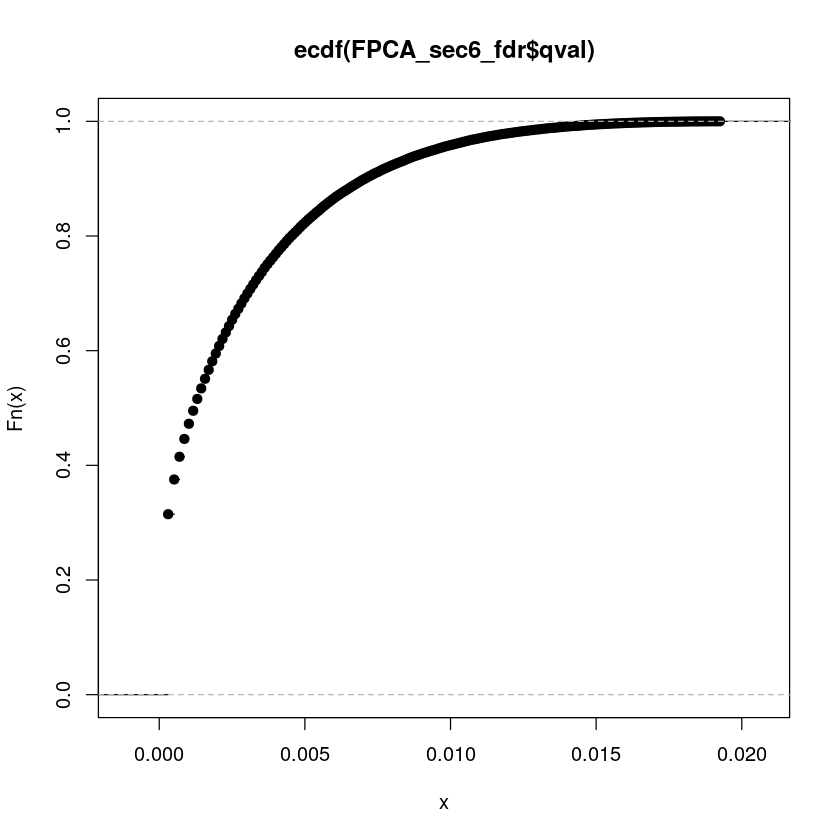

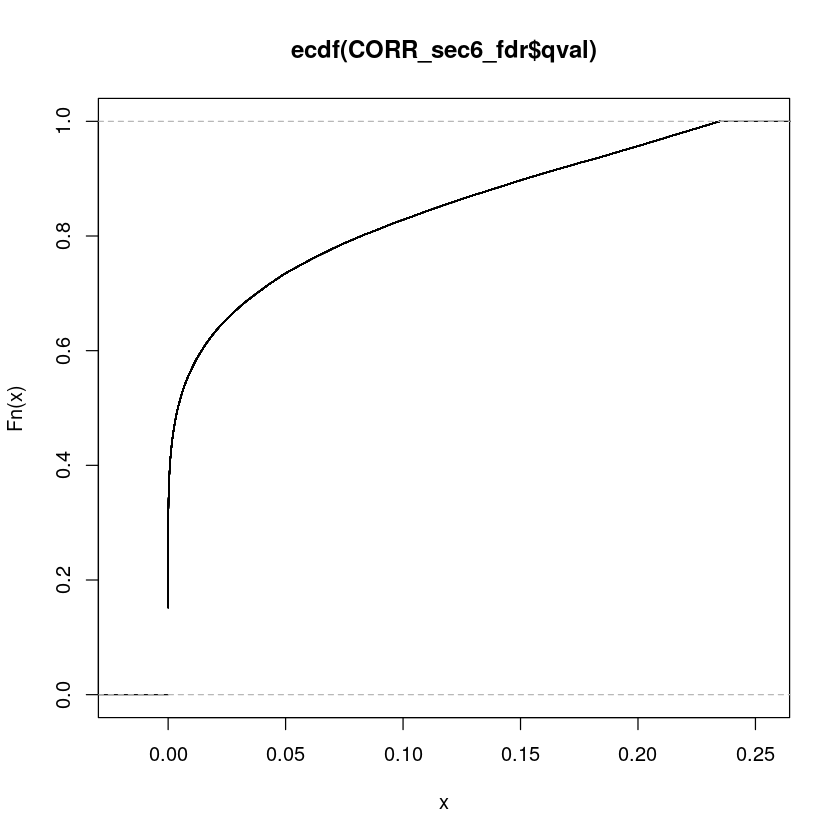

In [16]:
plot(ecdf(HSIC_sec6_fdr$qval))
plot(ecdf(FPCA_sec6_fdr$qval))
plot(ecdf(CORR_sec6_fdr$qval))

In [17]:
HSIC_ecdf_sec6 = ecdf(FPCA_sec6_fdr$qval)
FPCA_ecdf_sec6 = ecdf(FPCA_sec6_fdr$qval)
CORR_ecdf_sec6 = ecdf(CORR_sec6_fdr$qval)
plot(log(x), CORR_ecdf_sec6(x))

ERROR: Error in plot(log(x), CORR_ecdf_sec6(x)): object 'x' not found


In [18]:
quantile(HSIC_sec6_fdr$qval, probs = 0.8404)
quantile(FPCA_sec6_fdr$qval, probs = 0.8404)
quantile(CORR_sec6_fdr$qval, probs = 0.8404)

84.04% 
1.003605e-07

84.04% 
0.00538119

84.04% 
0.108077

In [19]:
HSIC_sec6_adj = matrix(0,nrow(HSIC_sec6),ncol(HSIC_sec6))
HSIC_sec6_adj[lower.tri(HSIC_sec6_adj)] = as.numeric(HSIC_sec6_fdr$qval < 1.00360494897673e-07)
HSIC_sec6_adj = as.matrix(Matrix::forceSymmetric(HSIC_sec6_adj,uplo = "L"))

FPCA_sec6_adj = matrix(0,nrow(FPCA_sec6),ncol(FPCA_sec6))
FPCA_sec6_adj[lower.tri(FPCA_sec6_adj)] = as.numeric(FPCA_sec6_fdr$qval < 0.00538119014656205)
FPCA_sec6_adj = as.matrix(Matrix::forceSymmetric(FPCA_sec6_adj,uplo = "L"))

CORR_sec6_adj = matrix(0,nrow(CORR_sec6),ncol(CORR_sec6))
CORR_sec6_adj[lower.tri(CORR_sec6_adj)] = as.numeric(CORR_sec6_fdr$qval < 0.108077005936862)
CORR_sec6_adj = as.matrix(Matrix::forceSymmetric(CORR_sec6_adj,uplo = "L"))

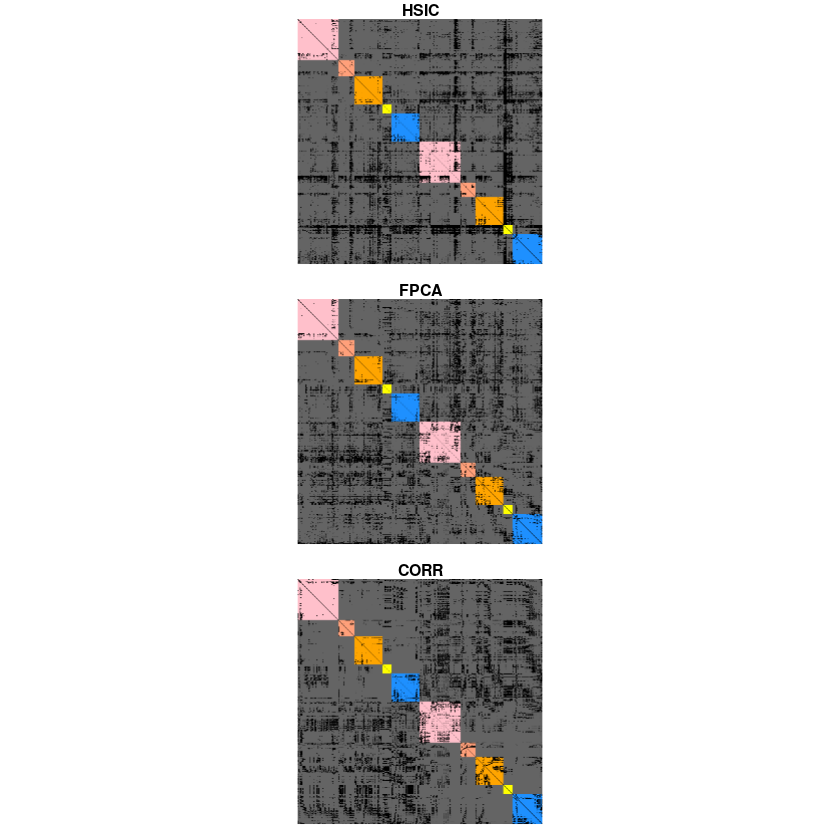

In [20]:
HSIC_raster_sec6 = as.raster(acomb3(raster_All[,,1] * HSIC_sec6_adj, 
                                      raster_All[,,2] * HSIC_sec6_adj, 
                                      raster_All[,,3] * HSIC_sec6_adj), 
                               max = 255)

FPCA_raster_sec6 = as.raster(acomb3(raster_All[,,1] * FPCA_sec6_adj, 
                                      raster_All[,,2] * FPCA_sec6_adj, 
                                      raster_All[,,3] * FPCA_sec6_adj), 
                               max = 255)

CORR_raster_sec6 = as.raster(acomb3(raster_All[,,1] * CORR_sec6_adj, 
                                      raster_All[,,2] * CORR_sec6_adj, 
                                      raster_All[,,3] * CORR_sec6_adj), 
                               max = 255)

op <- par(mar=c(1,1,1.2,1), mfrow = c(3,1))
plot(HSIC_raster_sec6)
title(main="HSIC")

plot(FPCA_raster_sec6)
title(main="FPCA")

plot(CORR_raster_sec6)
title(main="CORR")
par(op)

## Community Sorted Laplace Matrix Comparison

In [33]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [34]:
HSIC_graph = graph.adjacency(HSIC_adj, "undirected")
FPCA_graph = graph.adjacency(FPCA_adj, "undirected")

In [11]:
# cliques(HSIC_graph, min = 20) #Very slow

In [35]:
HSIC_cl = membership(cluster_louvain(HSIC_graph))

In [36]:
FPCA_cl = membership(cluster_louvain(FPCA_graph))

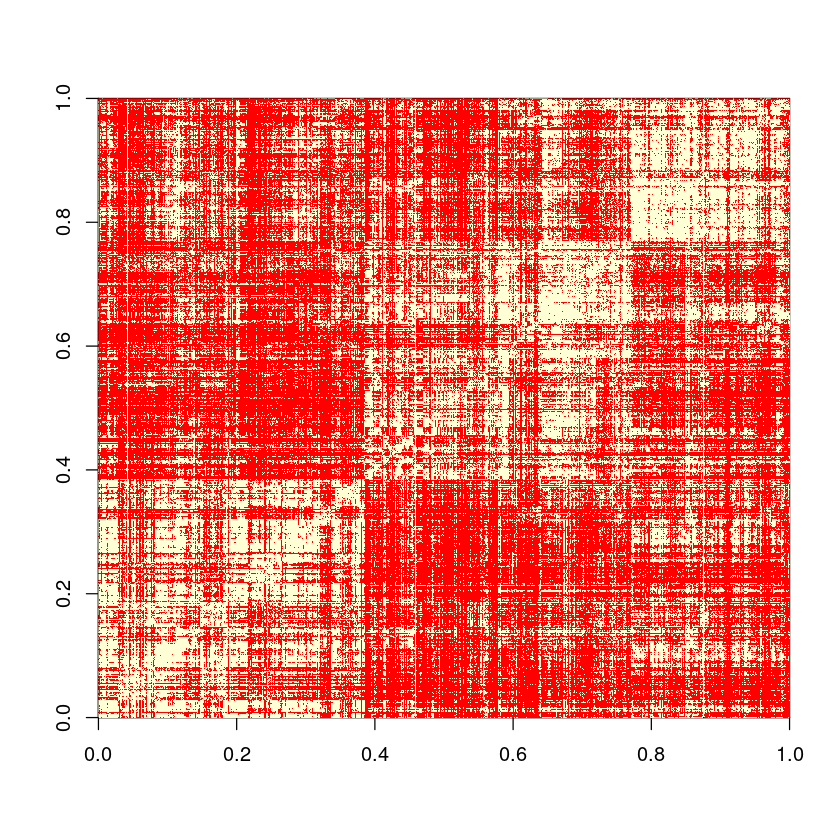

In [37]:
HSIC_image = as.matrix(Matrix::forceSymmetric(HSIC_adj,uplo = "L"))[order(HSIC_cl,atlas),order(HSIC_cl,atlas)]
image(HSIC_image)

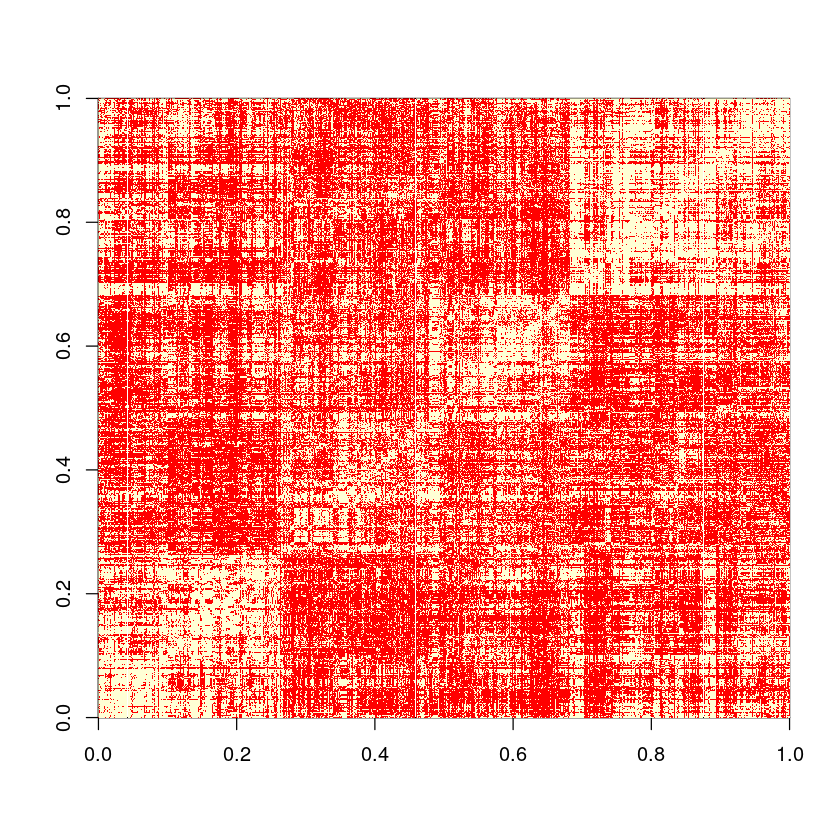

In [38]:
FPCA_image = as.matrix(Matrix::forceSymmetric(FPCA_adj,uplo = "L"))[order(FPCA_cl,atlas),order(FPCA_cl,atlas)]
image(FPCA_image)

It shows that Laplace image by HSIC is much more clear than that by FPCA. Then we want to find the best thresholds to maximize modularity respectively for HSIC and FPCA.

### Find the best threshold of q-values to maximize modularity

In [39]:
library(doParallel)

Loading required package: foreach
Loading required package: iterators
Loading required package: parallel


In [17]:
cl = parallel::makeForkCluster(detectCores()-2)
registerDoParallel(cl)

HSIC_Modu = foreach(p = seq(0.0001,0.0005,by=0.00003), .combine = 'c') %dopar%
  {
      HSIC_edges = (HSIC_fdr$qval < p)
      HSIC_adj = matrix(0,8004,8004)
      HSIC_adj[lower.tri(HSIC_adj)] = as.numeric(HSIC_edges)
      HSIC_graph = graph.adjacency(HSIC_adj, "undirected")
      modularity(cluster_louvain(HSIC_graph))
  }

parallel::stopCluster(cl)

HSIC_Modu

[1] 0.0000000 0.2152355 0.2152355 0.2152355 0.1802325 0.1802325 0.1596605
 [8] 0.1596605 0.1451210 0.1451210 0.1338578 0.1338578 0.1246740 0.1246740

In [18]:
cl = parallel::makeForkCluster(detectCores()-2)
registerDoParallel(cl)

FPCA_Modu = foreach(p = seq(0.004,0.005,by=0.0003), .combine = 'c') %dopar%
  {
      FPCA_edges = (FPCA_fdr$qval < p)
      FPCA_adj = matrix(0,8004,8004)
      FPCA_adj[lower.tri(FPCA_adj)] = as.numeric(FPCA_edges)
      FPCA_graph = graph.adjacency(FPCA_adj, "undirected")
      modularity(cluster_louvain(FPCA_graph))
  }

parallel::stopCluster(cl)

FPCA_Modu

[1] 0.2231490 0.2036438 0.2036438 0.1883251

### Comparison of modularity at same proportion of edges

In [47]:
cl = parallel::makeForkCluster(detectCores()-1)
registerDoParallel(cl)

HSIC_Modu = foreach(p = seq(0.000015,0.000070,by=0.000005), .combine = 'rbind') %dopar%
  {
      HSIC_edges = (HSIC_fdr$qval < p)
      HSIC_adj = matrix(0,8004,8004)
      HSIC_adj[lower.tri(HSIC_adj)] = as.numeric(HSIC_edges)
      HSIC_graph = graph.adjacency(HSIC_adj, "undirected")
      c(mean(HSIC_fdr$qval < p),modularity(cluster_louvain(HSIC_graph)))
  }

parallel::stopCluster(cl)

#HSIC_Modu

In [52]:
cl = parallel::makeForkCluster(detectCores()-1)
registerDoParallel(cl)

FPCA_Modu = foreach(p = seq(0.008,0.023,by=0.001), .combine = 'rbind') %dopar%
  {
      FPCA_edges = (FPCA_fdr$qval < p)
      FPCA_adj = matrix(0,8004,8004)
      FPCA_adj[lower.tri(FPCA_adj)] = as.numeric(FPCA_edges)
      FPCA_graph = graph.adjacency(FPCA_adj, "undirected")
      c(mean(FPCA_fdr$qval < p),modularity(cluster_louvain(FPCA_graph)))
  }

parallel::stopCluster(cl)

#FPCA_Modu

In [53]:
HSIC_Modu = unique(data.frame(HSIC_Modu))
FPCA_Modu = unique(data.frame(FPCA_Modu))

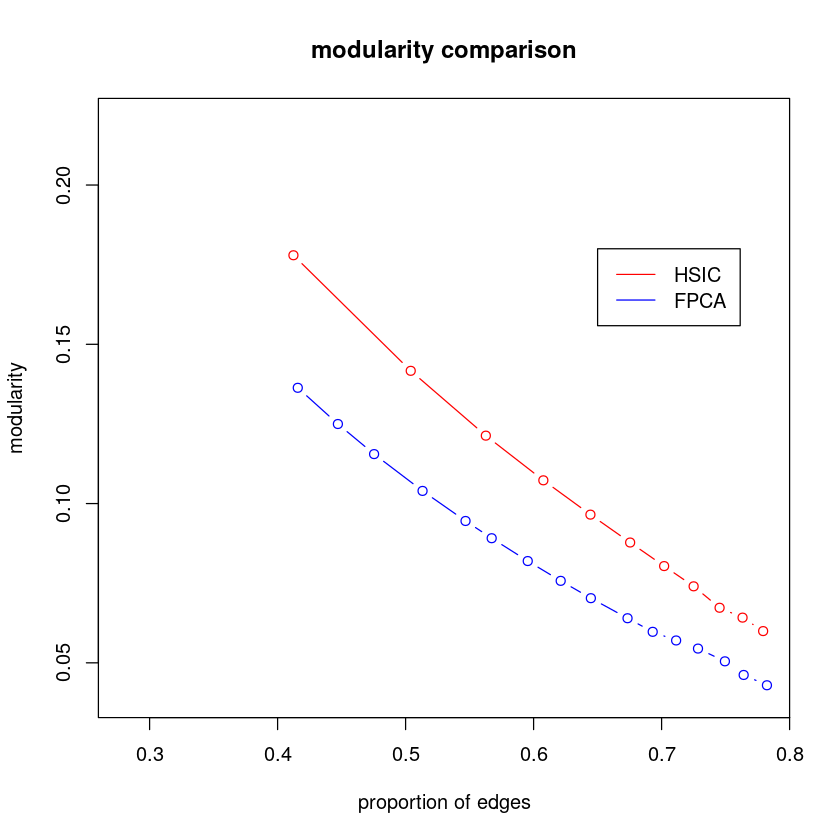

In [54]:
plot(HSIC_Modu$X1,HSIC_Modu$X2, type = "b", col = "red",main="modularity comparison",
     xlab = "proportion of edges",ylab = "modularity", xlim = c(0.28,0.78), ylim = c(0.04,0.22))
lines(FPCA_Modu$X1,FPCA_Modu$X2, type = "b" ,col="blue")
legend(0.65,0.18, legend = c("HSIC","FPCA"), col = c("red","blue"), lty=1)

In [5]:
#HSIC_image = as.matrix(Matrix::forceSymmetric(HSIC_adj,uplo = "L"))
#FPCA_image = as.matrix(Matrix::forceSymmetric(FPCA_adj,uplo = "L"))

In [6]:
#write.csv(HSIC_image,file="LF_HSIC.txt")
#write.csv(FPCA_image,file="LF_FPCA.txt")